# Avocado Price Prediction 

# Content

- The dataset below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military.

- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Attribute Information

1. Unnamed = SNo.
2. Date = The date of the observation
3. AveragePrice = The average price of a single avocado
4. Total Volume = Total number of avocados sold
5. 4046 = Total number of avocados with PLU 4046 sold(PLU 4046: non-organic small/medium Hass Avocados(~3-5 oz))
6. 4225 = Total number of avocados with PLU 4225 sold( PLU 4225:non-organic large Hass Avocados (~8-10 oz))
7. 4770 = Total number of avocados with PLU 4770 sold(PLU 4770: non-organic extra large Hass Avocados (~10-15 oz))
8. Total Bags = Total Number of Bags sold
9. Small Bags = Total Number of Small Bags sold
10. Large Bags = Total Number of Large Bags sold
11. XLarge Bags = Total Number of XLarge Bags sold
12. type = Organic or Conventional
13. year = The year of observation
14. region = The city or region of the observation


# Main Objective

- Perform extensive Exploratory Data Analysis(EDA) on Avocado dataset.

- Build a suitable Machine Learning Model that will help vendors, producers, associations, and companies to predict the future prices of avocado

In [2]:
# Displaying Image
from IPython.display import Image
from IPython.core.display import HTML
Image(url = "https://github.com/vanithavani96/Avocado-Price-Prediction--EDA-and---Machine-Learning-Project/blob/main/hass-avocado-fruits.jpg?raw=true")

In [2]:
# Importing the Libraries
import pandas as pd # Pandas is a powerful library in Python used for data manipulation and analysis.
import numpy as np # NumPy is another fundamental library in Python used for numerical computations, especially when working with arrays or matrices.
import seaborn as sns # Seaborn is a statistical data visualization library built on top of Matplotlib, making it easier to create more aesthetically pleasing and informative visualizations.
import matplotlib.pyplot as plt # Matplotlib is a widely used plotting library in Python that allows you to create various types of visualizations.
import warnings
warnings.filterwarnings('ignore') # These lines import the 'warnings' module and then set up a filter to ignore warnings. Warnings are typically messages that alert you about potential issues or non-standard behavior in your code. In this case, the code is set to ignore those warnings.

In [3]:
# Loading the dataset
df=pd.read_csv('avocado_1.csv',parse_dates=['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,4,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data Pre-Processing

In [12]:
# 1.To find out the number of records and features in the dataset
df.shape

(18249, 14)

- There are 18249 records and 14 features in the dataset.


In [46]:
# 2.Checking the data type for each column
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

- Date and region - object datatype.
- AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and XLarge Bags -float datatype
- year- int datatype

In [47]:
# 3.Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


- It gives the every information about the dataframe like column name, datatypes,etc.,

In [15]:
# 4.To check if there is any null values present in the dataset.
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

- There are zero Null Values i.e. the data is clean. 

In [114]:
# 5.Statistical Summary of the dataset
df_2.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,11.316380,8.992344,9.836480,5.053649,10.188148,9.698227,7.115979,2.261434,2016.147899
std,0.402677,2.293415,3.358087,2.850342,4.150570,2.261495,2.575460,3.837418,3.503338,0.939938
min,0.440000,4.449218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,1.100000,9.290960,6.751183,8.009622,0.000000,8.534962,7.955222,4.855695,0.000000,2015.000000
50%,1.370000,11.584108,9.064887,10.277187,5.225693,10.590235,10.179748,7.881828,0.000000,2016.000000
75%,1.660000,12.978408,11.617476,11.919775,8.739444,11.615341,11.330668,10.000172,4.894101,2017.000000
max,3.250000,17.950767,16.939795,16.834499,14.750207,16.779398,16.409614,15.559322,13.220750,2018.000000


- Average Prices seems normally distributed as mean and median are closure to each other.
- Data at Total Volume, Avocado Types (4046, 4225, 4770), Total Bags (Small, Large, XLarge) seems highly skewed Right side (positive skewed)

In [72]:
# 6.Dropping the Unnecessary Columns
# Load data into df_2 (replace 'data.csv' with your file path)
df_2 = pd.read_csv('avocado_1.csv')

# Check if the data is loaded properly
print(df_2.head())

# Dropping the unnecessary columns
df_2.drop(['Unnamed: 0'], axis=1, inplace=True)



   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           1  12/27/2015          1.33      64236.62  1036.74   54454.85   
1           2  12/20/2015          1.35      54876.98   674.28   44638.81   
2           3  12/13/2015          0.93     118220.22   794.70  109149.67   
3           4   12/6/2015          1.08      78992.15  1132.00   71976.41   
4           5  11/29/2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

- Dropping Unnamed: 0 as it is just Sr. No. 

In [73]:
df_2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Correlation Analysis

In [110]:
df_2.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


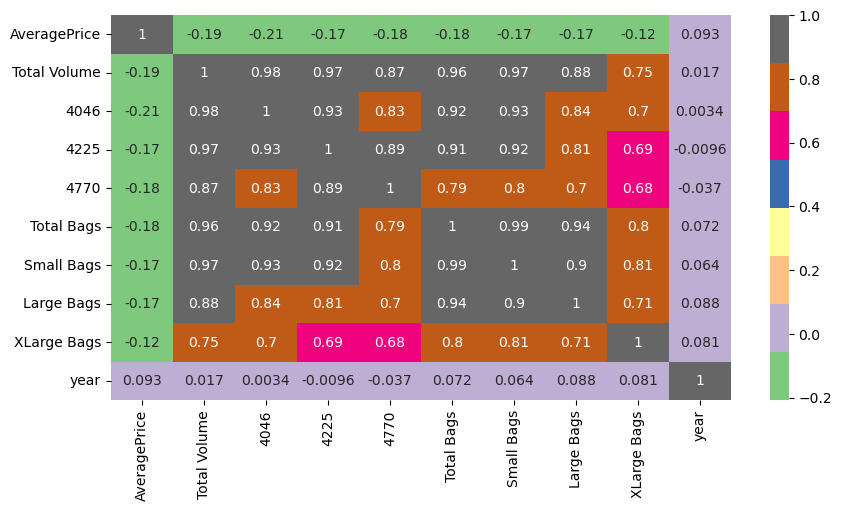

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(df_2.corr(),annot=True,cmap='Accent')
plt.show()

- The average price is highly correlated with year when compared with other features.

In [56]:
# Checking the unique value for 'type' feature
df.type.unique()

array(['conventional', 'organic'], dtype=object)

- It has two types one is 'conventional' and the other is 'organic'.

# Detecting Outliers

- We are creating a copy of the dataset to detect and treat the outliers.

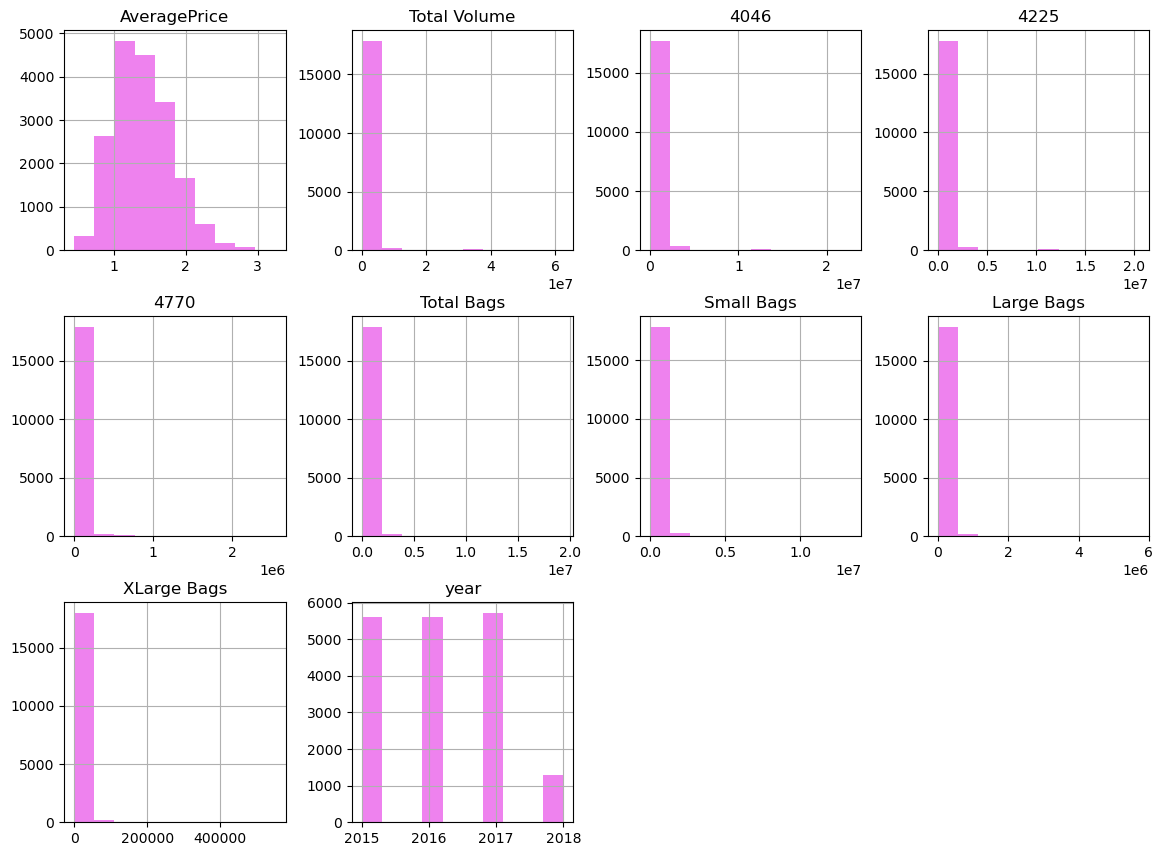

In [112]:
# Create a histogram
df_2.hist(figsize=(14, 14), grid=True, layout=(4, 4), color='violet')
plt.show()

In [101]:
df_2.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

## Using Log1p Method:
- Numpy log() function is used to get the natural logarithm of value x+1, where x is an element of an array or x is an object.
- The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

In [113]:
skew=('Total Volume','4046', '4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if df_2.skew().loc[col]>0.55:
        df_2[col]=np.log1p(df_2[col])

In [115]:
df_2.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
dtype: float64

# Removing Outliers using Z-Score

In [116]:
from scipy.stats import zscore
z =np.abs(zscore(df_2['AveragePrice']))
print(z)
print(np.where(z<3))
df_2[(z<3)]
print('Shape of New Dataframe df_2:',df_2.shape)

0        0.188689
1        0.139020
2        1.182069
3        0.809551
4        0.312861
           ...   
18244    0.556347
18245    0.755023
18246    1.152375
18247    1.301382
18248    0.531512
Name: AveragePrice, Length: 18249, dtype: float64
(array([    0,     1,     2, ..., 18246, 18247, 18248], dtype=int64),)
Shape of New Dataframe dn: (18249, 13)


In [117]:
z =np.abs(zscore(df_2['4225']))
print(z)
print(np.where(z<3))
df_2[(z<3)]
print('Shape of New Dataframe df_2:',df_2.shape)

0        0.374936
1        0.305200
2        0.618892
3        0.472808
4        0.298852
           ...   
18244    0.878279
18245    0.594835
18246    0.712597
18247    0.644192
18248    0.726698
Name: 4225, Length: 18249, dtype: float64
(array([    0,     1,     2, ..., 18246, 18247, 18248], dtype=int64),)
Shape of New Dataframe df_2: (18249, 13)


In [118]:
z =np.abs(zscore(df_2['Total Bags']))
print(z)
print(np.where(z<3))
df_2[(z<3)]
print('Shape of New Dataframe df_2:',df_2.shape)

0        0.494074
1        0.454761
2        0.523041
3        0.672335
4        0.644845
           ...   
18244    0.299689
18245    0.466102
18246    0.459975
18247    0.391424
18248    0.351204
Name: Total Bags, Length: 18249, dtype: float64
(array([    0,     1,     2, ..., 18246, 18247, 18248], dtype=int64),)
Shape of New Dataframe df_2: (18249, 13)


In [119]:
z =np.abs(zscore(df_2['Small Bags']))
print(z)
print(np.where(z<3))
df_2[(z<3)]
print('Shape of New Dataframe df_2:',df_2.shape)

0        0.247796
1        0.213093
2        0.273995
3        0.409182
4        0.388616
           ...   
18244    0.085548
18245    0.232904
18246    0.215422
18247    0.155249
18248    0.119000
Name: Small Bags, Length: 18249, dtype: float64
(array([    0,     1,     2, ..., 18246, 18247, 18248], dtype=int64),)
Shape of New Dataframe df_2: (18249, 13)


In [120]:
z =np.abs(zscore(df_2['XLarge Bags']))
print(z)
print(np.where(z<3))
df_2[(z<3)]
print('Shape of New Dataframe df_2:',df_2.shape)

0        0.645526
1        0.645526
2        0.645526
3        0.645526
4        0.645526
           ...   
18244    0.645526
18245    0.645526
18246    0.645526
18247    0.645526
18248    0.645526
Name: XLarge Bags, Length: 18249, dtype: float64
(array([    0,     1,     2, ..., 18246, 18247, 18248], dtype=int64),)
Shape of New Dataframe df_2: (18249, 13)


# Feature Engineering

In [74]:
df_2['Date']=pd.to_datetime(df_2['Date'])
df_2['Month']=df_2['Date'].apply(lambda x:x.month)
df_2['Day']=df_2['Date'].apply(lambda x:x.day)
df_2.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


- We are extracting day and month separately from the 'Date' feature using feature engineering for further analysis.

# Data Visualization

<AxesSubplot:title={'center':'Price tread Yearly'}, xlabel='year', ylabel='AveragePrice'>

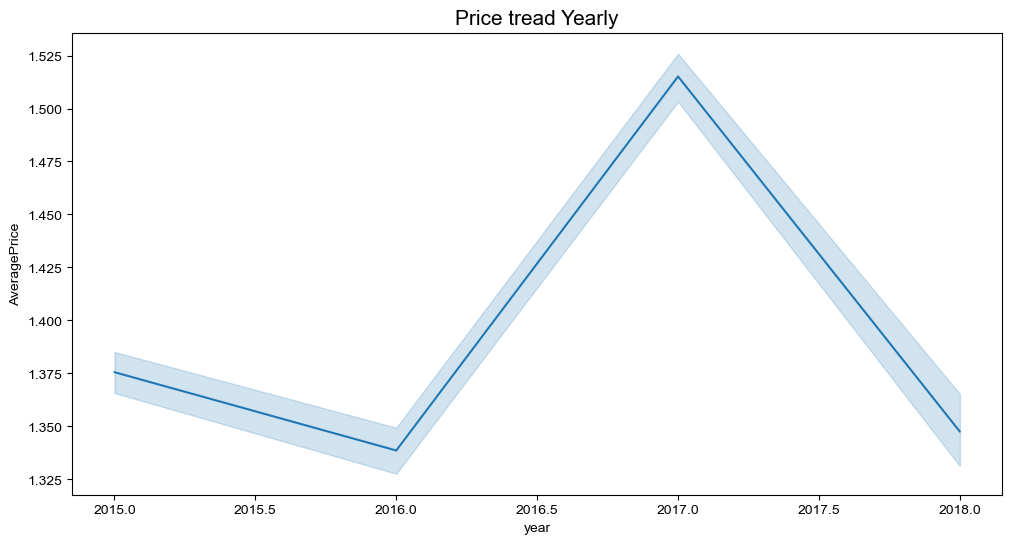

In [123]:
# 1.Price tread Yearly
plt.figure(figsize=(12,6))
plt.title('Price tread Yearly',fontsize=15)
sns.set_style('whitegrid')
sns.lineplot(df_2['year'],df_2['AveragePrice'],data=df_2)

- From the above graph we can conclude, most profit is achieve in year 2017.

<AxesSubplot:title={'center':'Areawise Sales of Avacado in US'}, xlabel='region'>

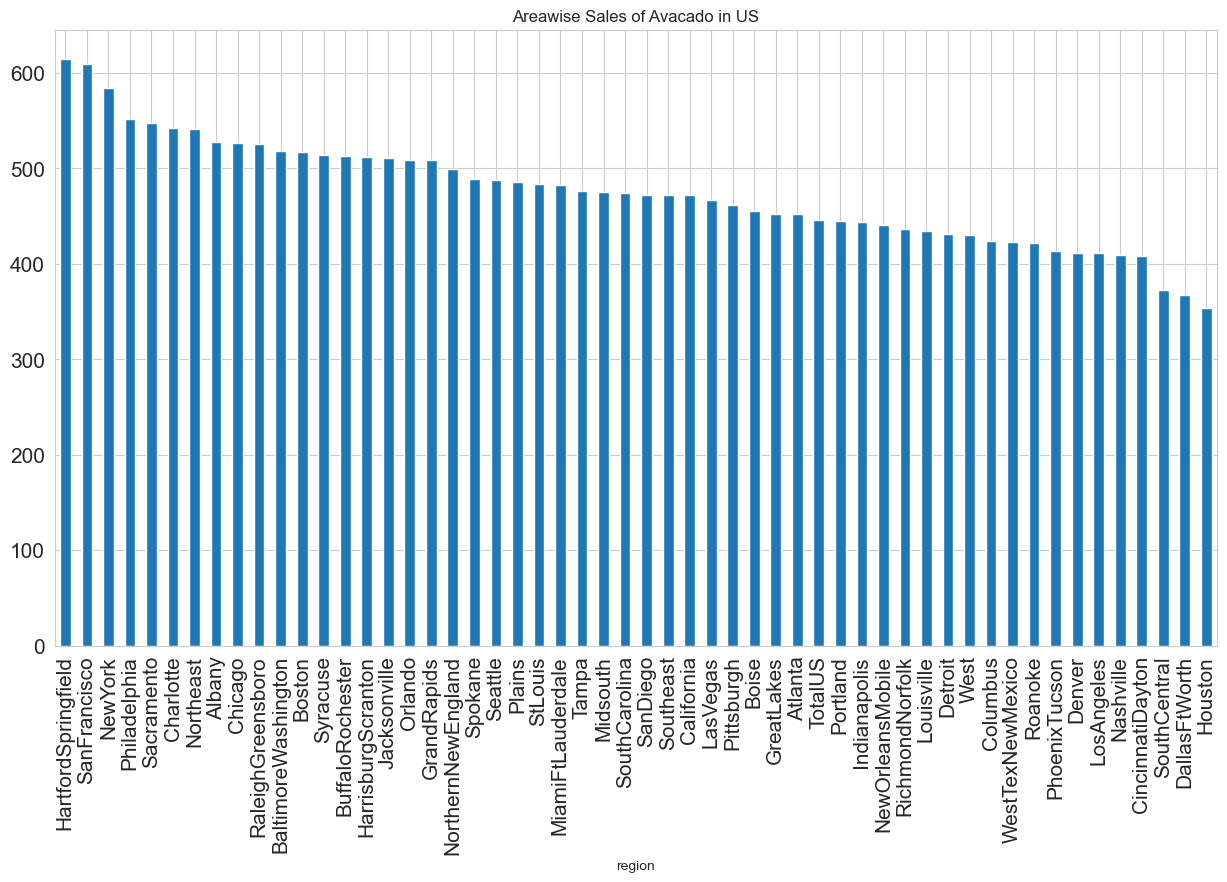

In [125]:
# 2.Areawise Sales of Avacado in US
df_2.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(15,8),title='Areawise Sales of Avacado in US',fontsize=15)

- From Area wise Sales of Avocado in US,  we can conclude that the most profit giving area is Hartford Springfield and least is Houston.

<AxesSubplot:title={'center':' Price of Avacado in US'}, xlabel='region'>

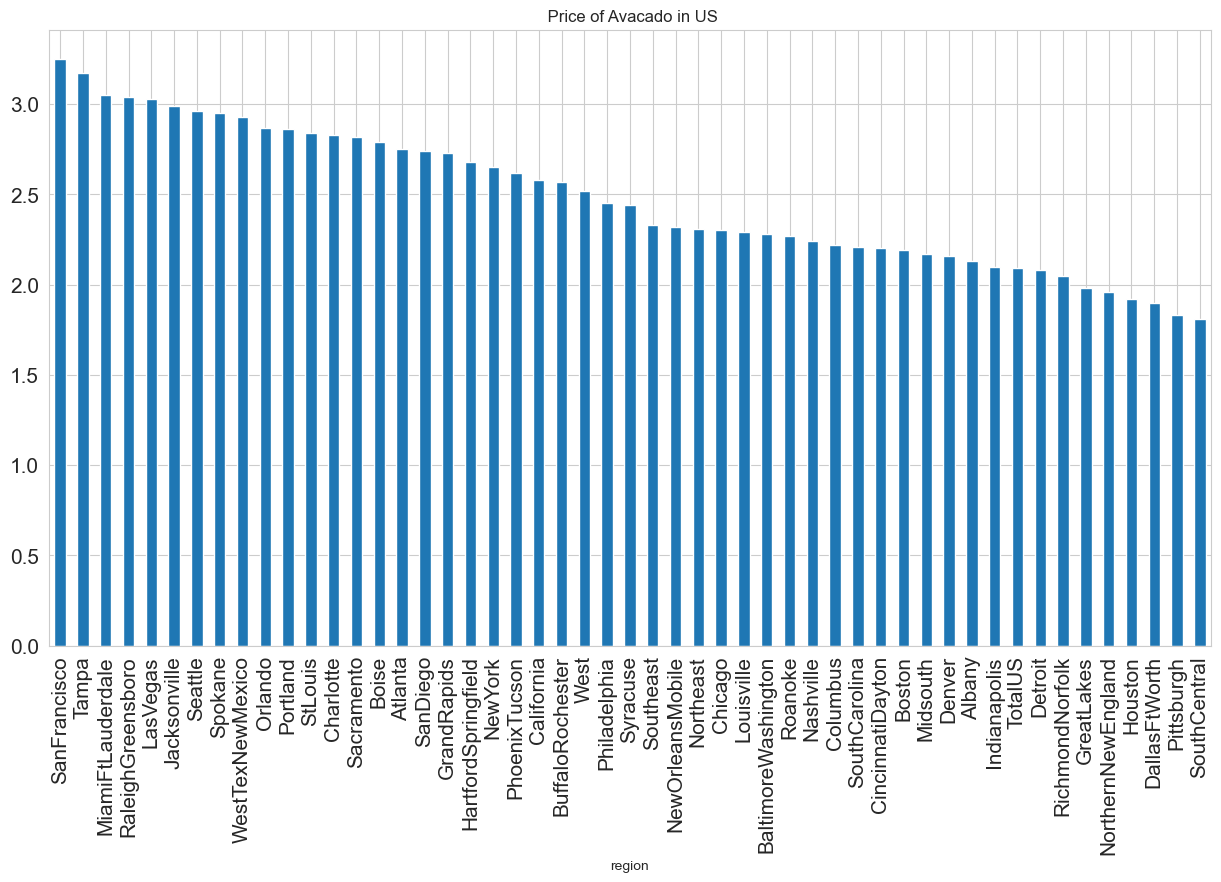

In [20]:
# 3.Price of Avacado in US
df_2.groupby('region')['AveragePrice'].max().sort_values(ascending=False).drop_duplicates().plot(kind='bar',figsize=(15,8),title=' Price of Avacado in US',fontsize=15)

- From Price of Avacado in US,  we can see that Sanfrancisco has highest price of Avocado and southCentral has the lowest price of Avocado in US.

Total Unit Sold Small_Hass: year
2015    1709.449981
2016    1525.122892
2017    1652.038132
2018     460.499734
Name: 4046, dtype: float64


Total Unit Sold Large_Hass: year
2015    1761.054036
2016    1672.728288
2017    1544.734720
2018     407.758674
Name: 4225, dtype: float64


Total Unit Sold Extralarge_Hass: year
2015    142.772395
2016    159.879845
2017     91.217508
2018     22.932595
Name: 4770, dtype: float64


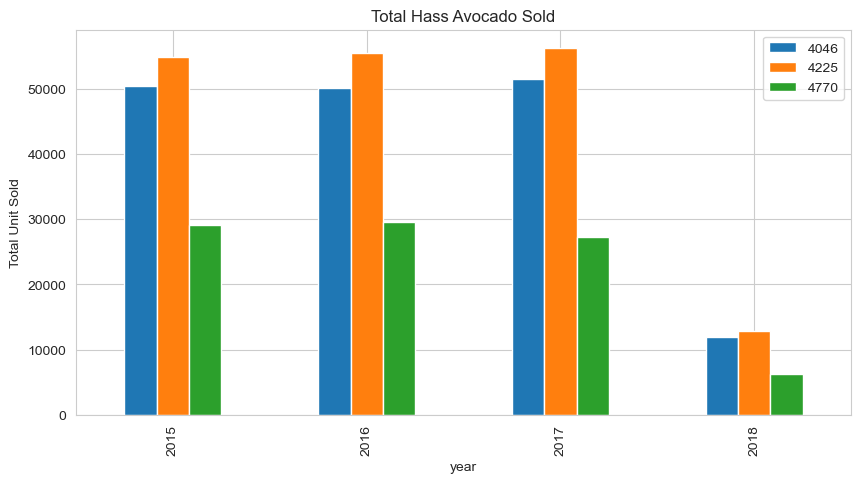

In [144]:
# 4.Visualizing theTotal unit sold for Different Sizes of Avocadoes by Year
d2=df_2.copy()
d2.drop(['Date','AveragePrice','Total Volume','region','Total Bags','Small Bags','Large Bags','XLarge Bags','Month','Day'],axis=1,inplace=True)
d2.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Hass Avocado Sold')
plt.ylabel('Total Unit Sold')
print('Total Unit Sold Small_Hass:',(df.groupby(['year'])['4046'].sum())/1000000)
print('\n')
print('Total Unit Sold Large_Hass:',(df.groupby(['year'])['4225'].sum())/1000000)
print('\n')
print('Total Unit Sold Extralarge_Hass:',(df.groupby(['year'])['4770'].sum())/1000000)
plt.show()

- From the above results, we can see that Large size of avocadoes are mostly bought by the people. So we need to produce large size avocadoes more and need to enocurage people to buy extralarge Avocadoes too and it was bought less by the people.

Total Small Bags sold (in Million): year
2015     634.682705
2016    1106.494240
2017    1222.952525
2018     360.741368
Name: Small Bags, dtype: float64


Total Large Bags sold (in Million): year
2015    132.066400
2016    336.626342
2017    399.339040
2018    123.583988
Name: Large Bags, dtype: float64


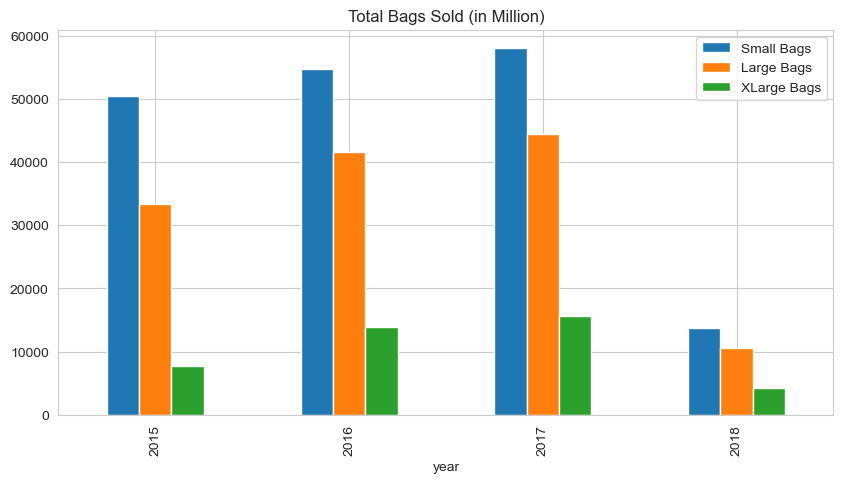

In [148]:
# 5.Visualizing the different type of total bags sold by Year
d3=df_2.copy()
d3.drop(['Date','AveragePrice','Total Volume','4046','4225','4770','region','Total Bags','Month','Day'],axis=1,inplace=True)
d3.groupby(['year']).sum().plot(kind='bar',figsize=(10,5),legend=True)
plt.title ('Total Bags Sold (in Million)')
print('Total Small Bags sold (in Million):',(df.groupby(['year'])['Small Bags'].sum())/1000000)
print('\n')
print('Total Large Bags sold (in Million):',(df.groupby(['year'])['Large Bags'].sum())/1000000)

- For every year, small bags were mostly bought by people.

In [149]:
# 6.Checking which type of Avocado is preferred most.
x=df['type'].unique()
x

array(['conventional', 'organic'], dtype=object)

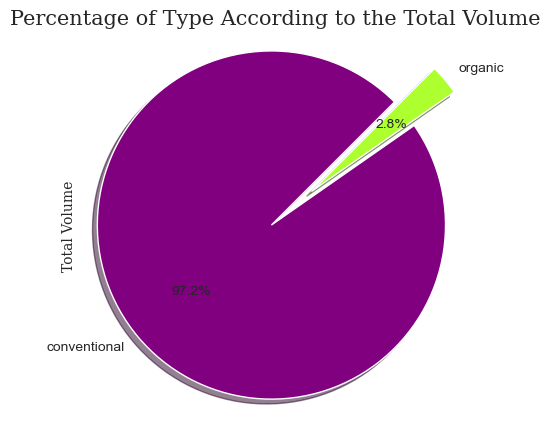

In [150]:
x=['conventional','organic']
y=df.groupby('type')['Total Volume'].sum()
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))
colors=['purple','greenyellow']
plt.pie(y,labels=x,shadow=True,colors=colors,explode=(0.3,0),autopct='%1.1f%%',startangle=45)
plt.title('Percentage of Type According to the Total Volume',fontsize=15, fontfamily='serif')
plt.ylabel('Total Volume',fontsize=10, fontfamily='serif',)
plt.axis('equal')
plt.show()

- 97.2% of conventional type avocado is preferred most and need to produce more conventional type avocadoes.
- 2.8% of organic type is preferres less
- One of the reasons for that the average price of organic avocado is very high as compared to conventional type.

# Distribution Of Average Price

<Figure size 900x700 with 0 Axes>

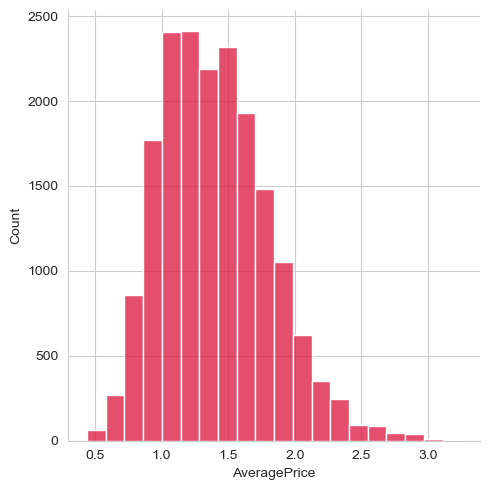

In [151]:
plt.figure(figsize=(9,7),dpi=100)
sns.displot(df['AveragePrice'],kind='hist',bins=20,color="crimson",label="Average Price")
plt.show()

- The average price is positively skewed
- The minimum average price is 1.10
- The maximum average price is 3.25

# Encoding of Categorical Attribute

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_2['region']=le.fit_transform(df_2['region'])

In [79]:
x=df_2.drop(['AveragePrice','type','Date'],axis=1)
y=df_2[['AveragePrice']]

In [80]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558,-1.221282,-1.700252,1.647632,1.291857
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558,-1.221282,-1.700252,1.647632,0.494231
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558,-1.221282,-1.700252,1.647632,-0.303396
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558,-1.221282,-1.700252,1.647632,-1.101022
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558,-1.221282,-1.700252,1.364669,1.519750
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.241373,-0.230017,-0.243857,-0.212540,-0.229301,-0.226665,-0.220964,-0.17558,1.970504,1.700811,-1.181997,-1.328915
18245,-0.242296,-0.230693,-0.242277,-0.212540,-0.233594,-0.232196,-0.221403,-0.17558,1.970504,1.700811,-1.464959,1.405803
18246,-0.242331,-0.230693,-0.243090,-0.205766,-0.233463,-0.231644,-0.222561,-0.17558,1.970504,1.700811,-1.464959,0.608177
18247,-0.241625,-0.230428,-0.242651,-0.205774,-0.231866,-0.229543,-0.222529,-0.17558,1.970504,1.700811,-1.464959,-0.189449


# Feature Importance

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [82]:
print(extra.feature_importances_)

[0.11710312 0.15431237 0.09666875 0.0553633  0.10736774 0.08348281
 0.10311342 0.01551586 0.0776375  0.08399971 0.09279157 0.01264385]


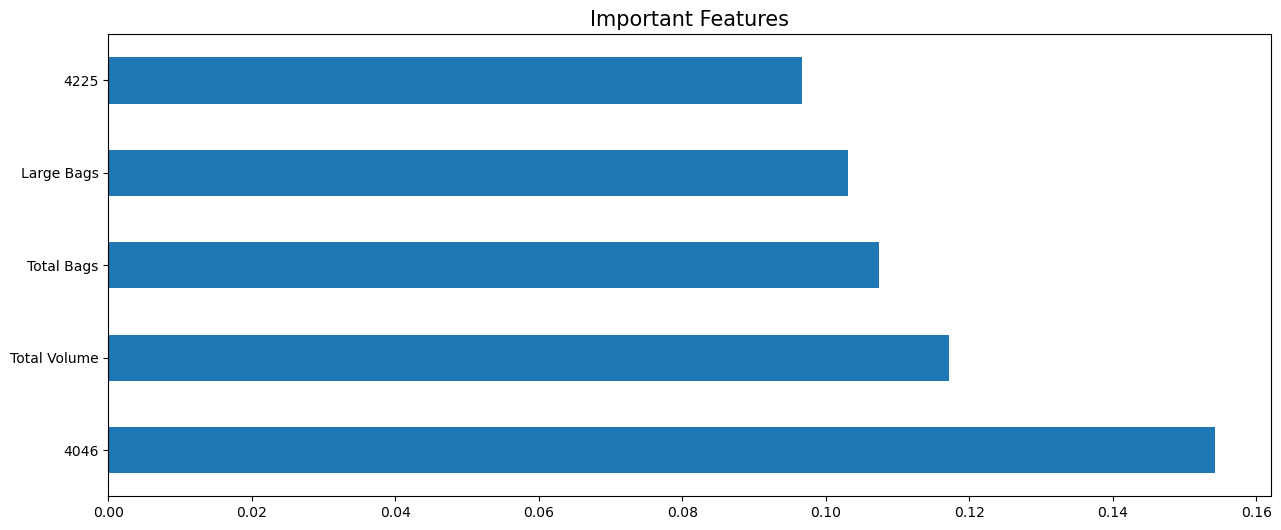

In [83]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

- Hence we can see that Avocado Hass number 4046 is our most important features among all the features.

# PCA

In [84]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_matrix=PCA(n_components=12)

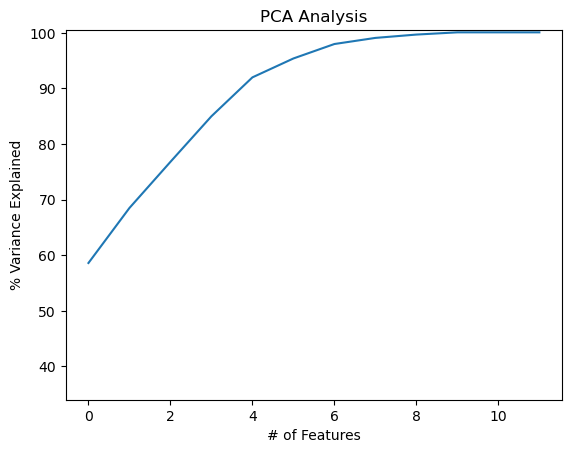

In [85]:
#Calculate Eigenvalues
covar_matrix.fit(x)  ## x should be scaled
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var # cumulative sum of variance explained with [n] features
## draw the graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

- Based on the plot above it is clear we should pick 9 features at 99% variance.

In [86]:
pca=PCA(n_components=9)
x=pca.fit_transform(x)
x.shape

(18249, 9)

# Model Building

In [87]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [88]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

max r2 score corresponding to 78 is 0.48451685596087524


cross validation score -0.04679386794963876


Standard Deviation 0.3411959652150116


Training accuracy 0.46529491779464827


Test Accuracy 0.45230284566829015


MAE 0.09673776379566384


MSE 0.014676923268707657


RMSE 0.12114835231528184




78

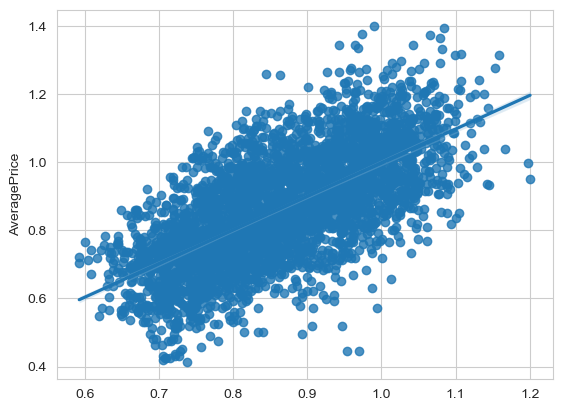

In [56]:
## Linear Regression 
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 78 is 0.48451371870986837


cross validation score -0.04677586883819207


Standard Deviation 0.3411998241686168


Training accuracy 0.4652949143264622


Test Accuracy 0.4523033384869798


MAE 0.09673768426183925


MSE 0.014676910062390925


RMSE 0.12114829781053849




78

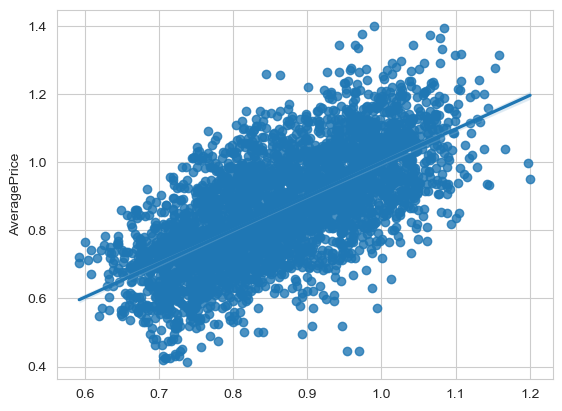

In [57]:
## Ridge
rigde=Ridge()
maxr2_score(rigde,x,y)

max r2 score corresponding to 69 is 0.6324209572527397


cross validation score -0.8197033204098647


Standard Deviation 0.8106575121867627


Training accuracy 1.0


Test Accuracy 0.6056313955438397


MAE 0.07003121993971524


MSE 0.010568098996703648


RMSE 0.10280125970387546




69

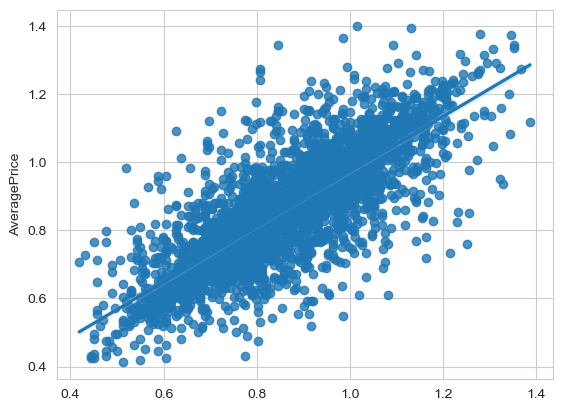

In [58]:
## Decision Tree
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)

max r2 score corresponding to 72 is 0.7509007460341334


cross validation score -0.11574221735022454


Standard Deviation 0.35514195427433176


Training accuracy 0.7589220714970163


Test Accuracy 0.7396146431950277


MAE 0.06587579514735921


MSE 0.006977680771017989


RMSE 0.08353251325692283




72

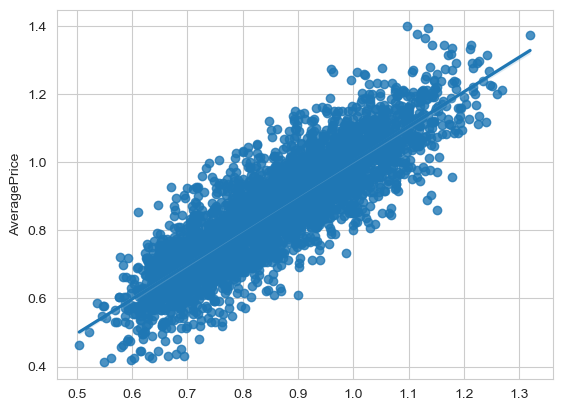

In [59]:
## SVm
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 48 is 0.8293489513277569


cross validation score -0.12541278385365376


Standard Deviation 0.5297037326967404


Training accuracy 0.9745600120455488


Test Accuracy 0.8197808069127722


MAE 0.05113220242795299


MSE 0.004829426714325565


RMSE 0.06949407682907634




48

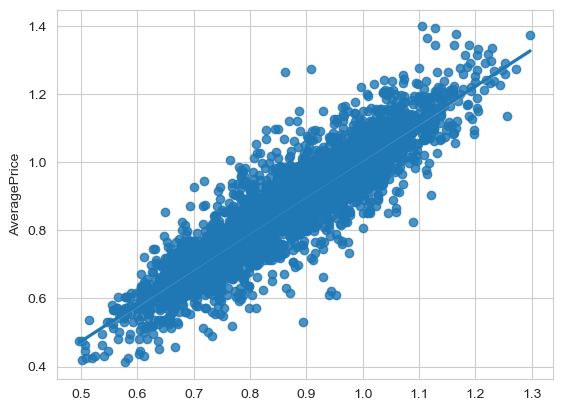

In [60]:
## Random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 50 is 0.4555077334989691


cross validation score -0.44250013753421397


Standard Deviation 0.9240373068764322


Training accuracy 0.43673667242006153


Test Accuracy 0.40173391686102533


MAE 0.24982195763848727


MSE 0.09515507874824333


RMSE 0.30847216851483267




50

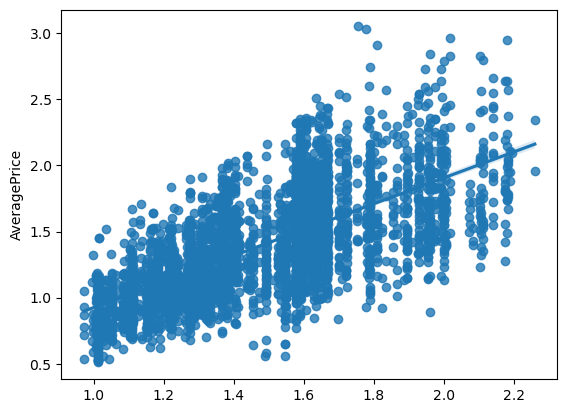

In [89]:
## AdaBoost
Adb=AdaBoostRegressor()
maxr2_score(Adb,x,y)

max r2 score corresponding to 50 is 0.6400932417795887


cross validation score -0.005004813961795284


Standard Deviation 0.44684316694223236


Training accuracy 0.6504870584424736


Test Accuracy 0.6167540735122905


MAE 0.07961151968659869


MSE 0.01027003885563045


RMSE 0.1013412001884251




50

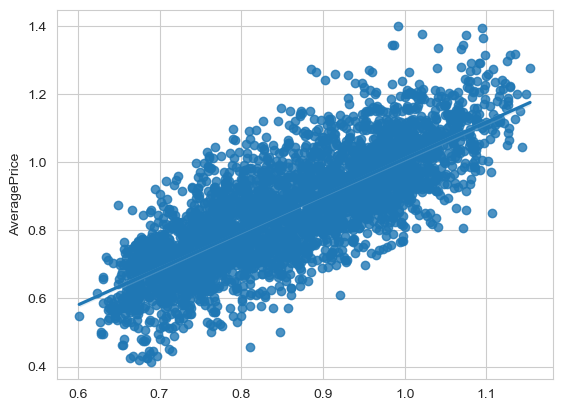

In [62]:
## Gradient Boost
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

# Result

In [90]:
df_result = pd.read_csv('Model Result.csv')
df_result

,Model,Score
0,Linear Regression,0.484516
1,Ridge,0.484513
2,Decision Tree,0.632420
3,SVm,0.750901
4,Random Forest,0.829348
5,AdaBoost,0.455507
6,Gradient Boost,0.640093


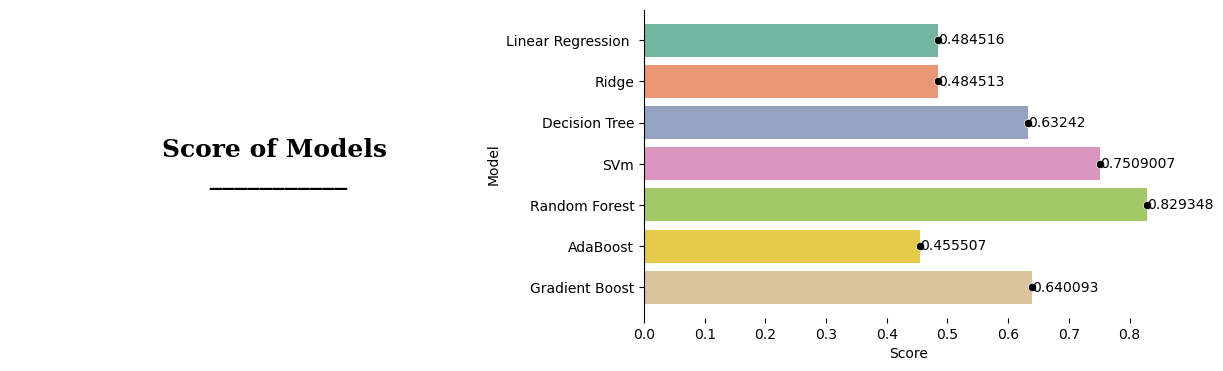

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_result' is your DataFrame containing the data for the bar plot

# Define the color palette using one of seaborn's predefined palettes
color_palette = sns.color_palette("Set2")

fig = plt.figure(figsize=(15, 4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Title
ax0.text(0.5, 0.5, 'Score of Models\n ___________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['left'].set_visible(False)

# Graph
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.barplot(x='Score', y='Model', data=df_result, palette=color_palette, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')

# Adding data points using seaborn's scatterplot
sns.scatterplot(x='Score', y='Model', data=df_result, color='black', ax=ax1)

# Add bar data points with values
for index, row in df_result.iterrows():
    ax1.text(row['Score'], index, str(row['Score']), color='black', va='center')

background_color = 'white'
fig.patch.set_facecolor(background_color)
axes = [ax0, ax1]

for ax in axes:
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'bottom']:
        ax.spines[s].set_visible(False)

plt.show()


# Conclusion
From EDA, we can conclude, the most profit giving area is Hartford Springfield and San Francisco has highest price of Avocado. People prefer large size Avocado and small bag size. There are 2 types of Avocados, 'conventional ‘and 'organic'. Out of which 'conventional' is preferred. 
Based upon the analysis of the result, we can suggest the company owners to enocurage the people to buy organic type of avocadoes.
The vendors, companies need to concentrate on those regions in which the avocados are not sold mostly to increase their profit.

From this Score of Models, we can surely conclude that out of all the models  - Linear Regression, Ridge, Decision Tree, SVm, Random Forest, AdaBoost and Gradient Boost the highest r2 score is of Random Forest and also the highest training and test accuracy also is coming from Random Forest which Training accuracy 0.9745600120455488 and Test Accuracy 0.8197808069127722 .

Our Random Forest algorithm yields the highest accuracy,83%. Any accuracy above 70% is considered good, but be careful because if your accuracy is extremely high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!


 